Calculated Discount: 75.39%


C:\Users\USER\AppData\Local\Temp\ipykernel_8208\895728226.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return (x - a) / (b - a)


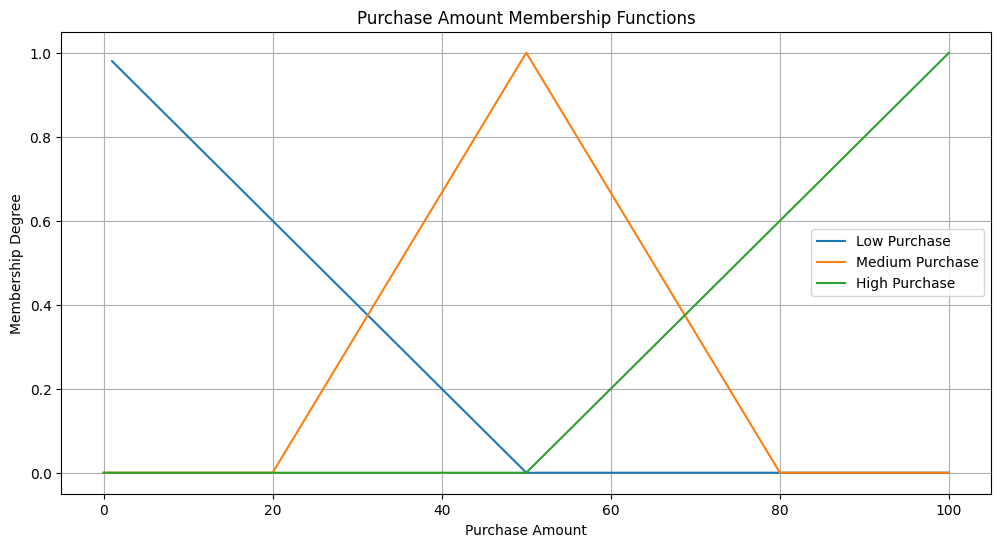

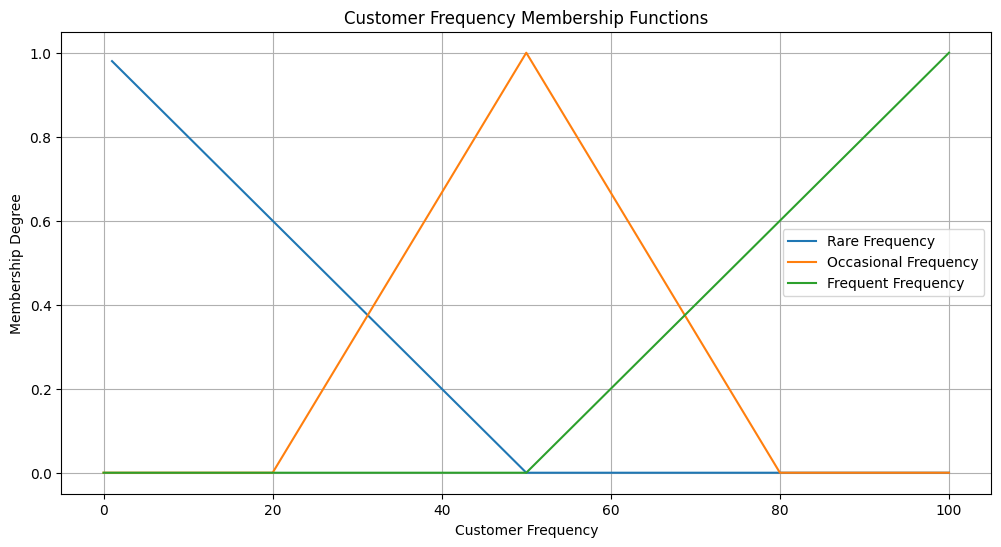

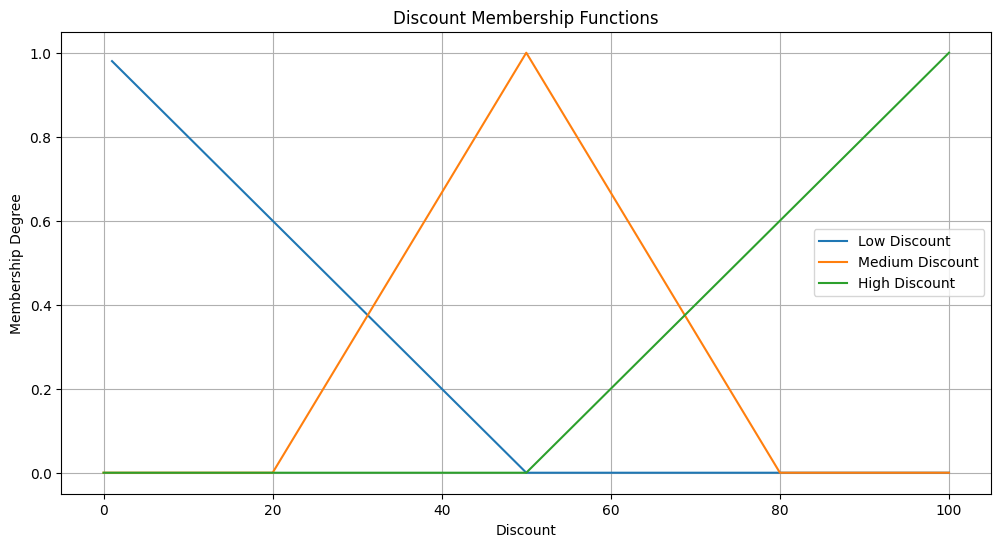

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define fuzzy variables for Tsukamoto Method
class FuzzyVariable:
    def __init__(self, name, universe, membership_functions):  # Fix __init__ method
        self.name = name
        self.universe = universe
        self.membership_functions = membership_functions

    def fuzzify(self, value):
        memberships = {}
        for label, func in self.membership_functions.items():
            memberships[label] = func(value)
        return memberships

# Membership functions for triangular shapes
def triangular(a, b, c):
    def func(x):
        if a <= x <= b:
            return (x - a) / (b - a)
        elif b <= x <= c:
            return (c - x) / (c - b)
        return 0
    return func

# Define input and output variables
purchase_amount = FuzzyVariable(
    "purchase_amount",
    universe=np.arange(0, 101, 1),
    membership_functions={
        "low": triangular(0, 0, 50),
        "medium": triangular(20, 50, 80),
        "high": triangular(50, 100, 100),
    },
)

customer_frequency = FuzzyVariable(
    "customer_frequency",
    universe=np.arange(0, 101, 1),
    membership_functions={
        "rare": triangular(0, 0, 50),
        "occasional": triangular(20, 50, 80),
        "frequent": triangular(50, 100, 100),
    },
)

discount = FuzzyVariable(
    "discount",
    universe=np.arange(0, 101, 1),
    membership_functions={
        "low": triangular(0, 0, 50),
        "medium": triangular(20, 50, 80),
        "high": triangular(50, 100, 100),
    },
)

# Define rules for Tsukamoto method
rules = [
    ("low", "rare", "low"),
    ("low", "occasional", "low"),
    ("low", "frequent", "medium"),
    ("medium", "rare", "low"),
    ("medium", "occasional", "medium"),
    ("medium", "frequent", "high"),
    ("high", "rare", "medium"),
    ("high", "occasional", "high"),
    ("high", "frequent", "high"),
]

def apply_rule(purchase, frequency, rule):
    purchase_level, frequency_level, discount_level = rule

    purchase_membership = purchase_amount.fuzzify(purchase)[purchase_level]
    frequency_membership = customer_frequency.fuzzify(frequency)[frequency_level]

    firing_strength = min(purchase_membership, frequency_membership)

    if firing_strength > 0:
        discount_value = defuzzify(discount_level, firing_strength)
        return firing_strength, discount_value
    return 0, 0

def defuzzify(level, firing_strength):
    if level == "low":
        return 25 + (25 * firing_strength)
    elif level == "medium":
        return 50 + (25 * firing_strength)
    elif level == "high":
        return 75 + (25 * firing_strength)
    return 0

def tsukamoto(purchase, frequency):
    weighted_sum = 0
    total_firing_strength = 0

    for rule in rules:
        firing_strength, value = apply_rule(purchase, frequency, rule)
        weighted_sum += firing_strength * value
        total_firing_strength += firing_strength

    return weighted_sum / total_firing_strength if total_firing_strength > 0 else 0

# Example: Simulate for a purchase of 70 and frequency of 60
result = tsukamoto(70, 60)
print(f"Calculated Discount: {result:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(purchase_amount.universe, [purchase_amount.fuzzify(x)["low"] for x in purchase_amount.universe], label="Low Purchase")
plt.plot(purchase_amount.universe, [purchase_amount.fuzzify(x)["medium"] for x in purchase_amount.universe], label="Medium Purchase")
plt.plot(purchase_amount.universe, [purchase_amount.fuzzify(x)["high"] for x in purchase_amount.universe], label="High Purchase")
plt.title("Purchase Amount Membership Functions")
plt.xlabel("Purchase Amount")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(customer_frequency.universe, [customer_frequency.fuzzify(x)["rare"] for x in customer_frequency.universe], label="Rare Frequency")
plt.plot(customer_frequency.universe, [customer_frequency.fuzzify(x)["occasional"] for x in customer_frequency.universe], label="Occasional Frequency")
plt.plot(customer_frequency.universe, [customer_frequency.fuzzify(x)["frequent"] for x in customer_frequency.universe], label="Frequent Frequency")
plt.title("Customer Frequency Membership Functions")
plt.xlabel("Customer Frequency")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(discount.universe, [discount.fuzzify(x)["low"] for x in discount.universe], label="Low Discount")
plt.plot(discount.universe, [discount.fuzzify(x)["medium"] for x in discount.universe], label="Medium Discount")
plt.plot(discount.universe, [discount.fuzzify(x)["high"] for x in discount.universe], label="High Discount")
plt.title("Discount Membership Functions")
plt.xlabel("Discount")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()
